In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import glob
import pickle
from sklearn.preprocessing import scale, MinMaxScaler, LabelEncoder

In [2]:
data_path = '/content/drive/My Drive/Mineria de datos/datasets/track_features/'

track_features_paths = sorted(glob.glob(data_path + "tf_*.csv"))
track_features_paths

['/content/drive/My Drive/Mineria de datos/datasets/track_features/tf_000000000000.csv',
 '/content/drive/My Drive/Mineria de datos/datasets/track_features/tf_000000000001.csv']

In [0]:
TRACKS = pd.concat([pd.read_csv(path) for path in track_features_paths], ignore_index=True)

In [0]:
import random
indexes = random.sample(range(1, TRACKS.shape[0]), 1000)
TRACKS_M = TRACKS.loc[indexes]
TRACKS_M.reset_index(inplace=True)

In [0]:
track_features_to_scale = [
      'acousticness', 'beat_strength', 'bounciness', 'danceability',
      'dyn_range_mean', 'energy', 'flatness', 'instrumentalness',
      'liveness', 'loudness', 'mechanism', 'organism', 'speechiness',
      'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
      'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
      'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
      'acoustic_vector_7', 'us_popularity_estimate', 'duration'
]

In [0]:
scaler1 = MinMaxScaler()
#TRACKS[[]] = scaler1.fit_transform(TRACKS[['us_popularity_estimate', 'duration']])

TRACKS_M[track_features_to_scale] = scale(TRACKS_M[track_features_to_scale])

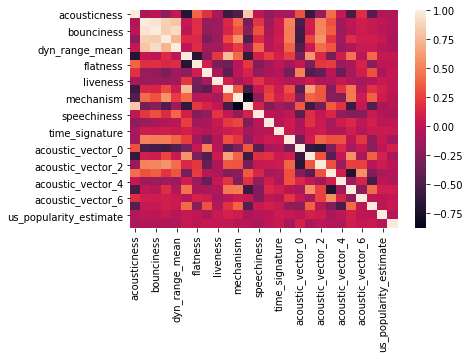

In [45]:
corrs = TRACKS_M[track_features_to_scale].corr()
seaborn.heatmap(corrs)

In [0]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# 1

In [0]:
tsne = TSNE(n_components=2)

In [0]:
x = tsne.fit_transform(
    TRACKS_M[
             [
              'acoustic_vector_0',
              'acoustic_vector_1', 
              'acoustic_vector_2', 
              'acoustic_vector_3',
              'acoustic_vector_4', 
              'acoustic_vector_5', 
              'acoustic_vector_6',
              'acoustic_vector_7' 
              ]
             ]
)

In [0]:
x = pd.DataFrame(x, columns=['x', 'y'])

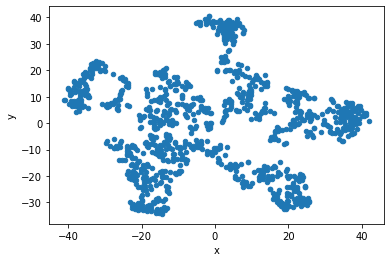

In [51]:
x.plot(kind='scatter', x='x', y='y')

In [0]:
x['us_popularity_estimate'] = TRACKS_M['us_popularity_estimate']

In [55]:
x.corr()

,x,y,us_popularity_estimate
x,1.000000,-0.062229,0.009626
y,-0.062229,1.000000,-0.036659
us_popularity_estimate,0.009626,-0.036659,1.000000


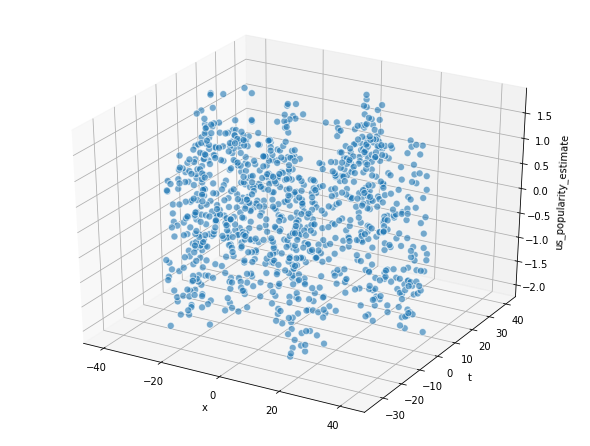

In [59]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(x['x'], x['y'], x['us_popularity_estimate'], s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('us_popularity_estimate')

plt.show()

# 2

In [0]:
tsne = TSNE(n_components=2)

In [0]:

comp = tsne.fit_transform(
    TRACKS_M[
             [
              'acousticness', 'beat_strength', 'bounciness', 'danceability',
      'dyn_range_mean', 'energy', 'flatness', 'instrumentalness',
      'liveness', 'loudness', 'mechanism', 'organism', 'speechiness',
      'tempo', 'time_signature', 'valence'
              ]
             ]
)

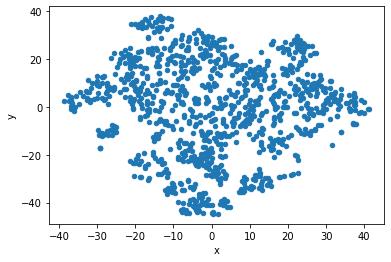

In [62]:
comp = pd.DataFrame(comp, columns=['x', 'y'])
comp.plot(kind='scatter', x='x', y='y')

In [63]:
comp['us_popularity_estimate'] = TRACKS_M['us_popularity_estimate']
comp.corr()

,x,y,us_popularity_estimate
x,1.000000,-0.033884,0.027507
y,-0.033884,1.000000,0.043244
us_popularity_estimate,0.027507,0.043244,1.000000


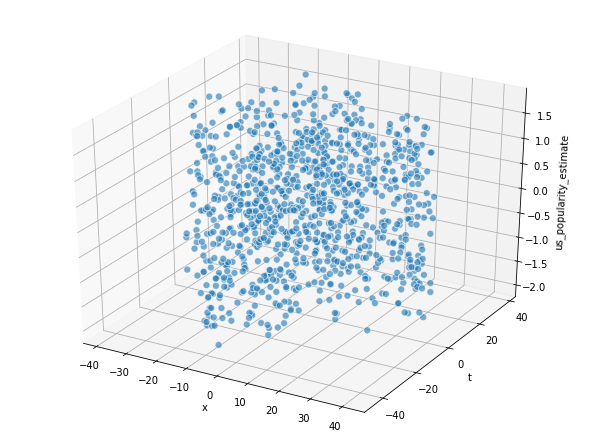

In [64]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(comp['x'], comp['y'], comp['us_popularity_estimate'], s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('us_popularity_estimate')

plt.show()